In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
!pip install yfinance
import yfinance as yf


import warnings
warnings.filterwarnings("ignore")

In [ ]:
stock = 'awk'

In [ ]:

data = yf.download(stock, "2021-01-01", "2022-01-01", auto_adjust = True)


[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
X = data[['Open-Close', 'High-Low']]


,Open-Close,High-Low
Date,,
2021-01-04 00:00:00-05:00,3.202992,5.033282
2021-01-05 00:00:00-05:00,-0.574394,2.540982
2021-01-06 00:00:00-05:00,-0.564664,3.086171
2021-01-07 00:00:00-05:00,1.713453,2.725960
2021-01-08 00:00:00-05:00,-4.760688,5.714769
...,...,...
2021-12-27 00:00:00-05:00,-0.345655,2.271414
2021-12-28 00:00:00-05:00,-2.370162,2.834336
2021-12-29 00:00:00-05:00,-0.878936,2.419543


In [ ]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)


In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(data))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
cls = SVC().fit(X_train, y_train)


In [ ]:
data['Predicted_Signal'] = cls.predict(X)


In [ ]:
accuracy_test = accuracy_score(y_test, cls.predict(X_test))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

Test Accuracy: 64.71%


In [ ]:
data['Return'] = df.Close.pct_change()


In [ ]:
data['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
data['Cum_Ret'] = df['Return'].cumsum()

In [ ]:
data['Cum_Strategy'] = df['Strategy_Return'].cumsum()


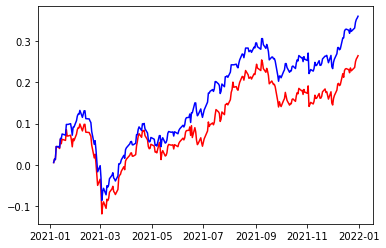

In [ ]:
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

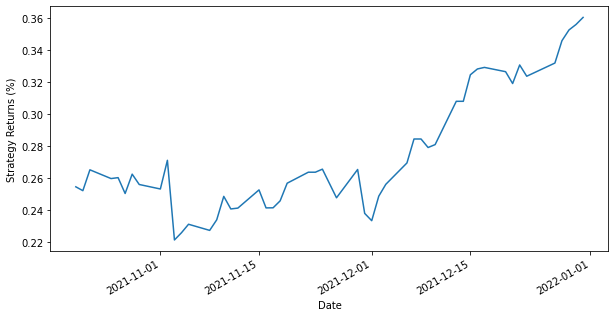

In [ ]:
df.Cum_Strategy.iloc[split:].plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

In [ ]:
df['Signal'] = np.where(df['Return']> 0, 1, 0)

In [ ]:
print(df['Cum_Strategy'])

Date
2021-01-04         NaN
2021-01-05    0.005657
2021-01-06    0.014063
2021-01-07    0.012554
2021-01-08    0.044434
                ...   
2021-12-27    0.331680
2021-12-28    0.345624
2021-12-29    0.352340
2021-12-30    0.355755
2021-12-31    0.360169
Name: Cum_Strategy, Length: 252, dtype: float64
